In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("/content/shanghai_ranking_2024.csv")
data.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


## кароче надо понять что у нас за дасетик

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [4]:
data.describe()

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


In [5]:
data.isnull().sum()

,0
Rank,0
University_Name,0
National/Regional Rank,0
Alumni,0
Award,0
Hici,0
N&S,11
PUB,0
PCP,0


## числовые столбики

In [6]:
numeric_columns = ['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']

## корреляционная матрица

In [7]:
corr_matrix = data[numeric_columns].corr()
corr_matrix

,Alumni,Award,Hici,N&S,PUB,PCP
Alumni,1.000000,0.785131,0.485946,0.708627,0.380827,0.624922
Award,0.785131,1.000000,0.542474,0.749831,0.375987,0.679825
Hici,0.485946,0.542474,1.000000,0.789252,0.712207,0.646556
N&S,0.708627,0.749831,0.789252,1.000000,0.632946,0.761529
PUB,0.380827,0.375987,0.712207,0.632946,1.000000,0.464444
PCP,0.624922,0.679825,0.646556,0.761529,0.464444,1.000000


## хитмапа кореляции

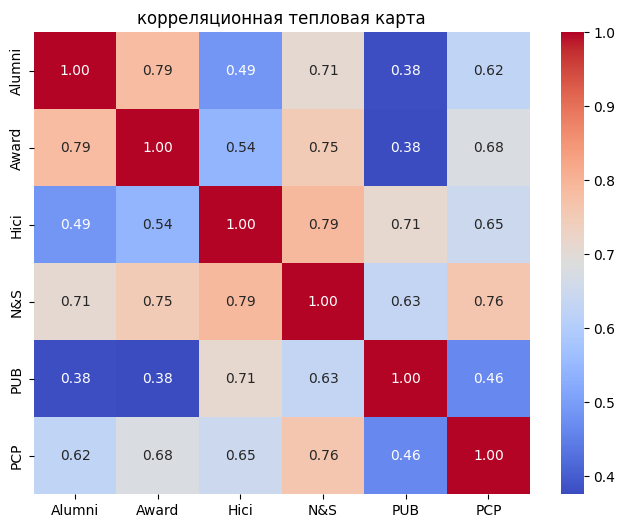

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('корреляционная тепловая карта')
plt.show()

In [9]:
corr_without_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
max_corr = corr_without_diag.max().max()
min_corr = corr_without_diag.min().min()

max_corr_pair = corr_without_diag.stack().idxmax()
min_corr_pair = corr_without_diag.stack().idxmin()

print(f"максимум корреляции {max_corr} у {max_corr_pair}")
print(f"минимум корреляции {min_corr} у {min_corr_pair}")

максимум корреляции 0.7892521991311098 у ('Hici', 'N&S')
минимум корреляции 0.375986681445833 у ('Award', 'PUB')


## теперь нам интересны признаки с максимальной корееляцией

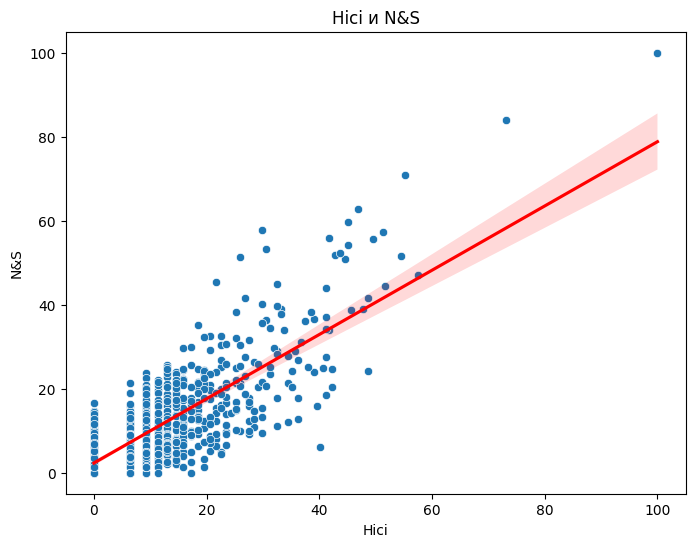

In [10]:
feature_1, feature_2 = max_corr_pair

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[feature_1], y=data[feature_2])
plt.title(f"{feature_1} и {feature_2}")
plt.xlabel(feature_1)
plt.ylabel(feature_2)

# линия регрессии
sns.regplot(x=data[feature_1], y=data[feature_2], scatter=False, color='red')
plt.show()

## нормализация

In [11]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)
data_scaled.head()

,Alumni,Award,Hici,N&S,PUB,PCP
0,9.456229,8.150362,8.156736,8.411022,4.744016,7.508463
1,4.039394,7.364312,5.698721,6.896707,2.777304,4.541217
2,6.673541,6.901416,4.063090,5.664562,1.753737,6.132843
3,7.297417,7.600127,3.140192,4.629937,2.345944,4.654904
4,6.019955,6.351181,3.304669,4.912107,1.607513,4.075097


## разделяем выборки

In [12]:
X = data_scaled[[feature_1]]
y = data_scaled[feature_2]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## обучаем линейную регрессию

In [14]:
# у нас оказались пропущенные значения в y_train по этому добавим туда среднее значения чтобы не удалять данные  целиком
y_train_np = y_train.to_numpy()
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train_np.reshape(-1, 1)).ravel()

In [15]:
model = LinearRegression()
model.fit(X_train, y_train_imputed )

LinearRegression()

## получаем предсказание

In [16]:
y_pred = model.predict(X_test)

## анализируем распределение ошибок

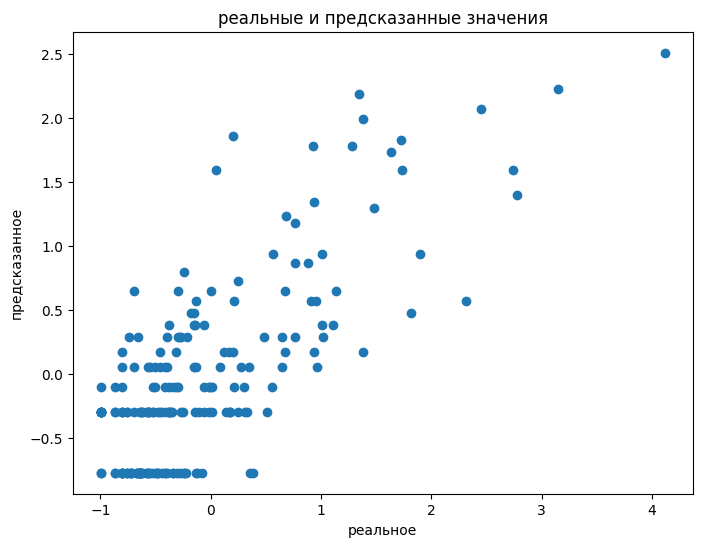

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('реальные и предсказанные значения')
plt.xlabel('реальное')
plt.ylabel('предсказанное')
plt.show()

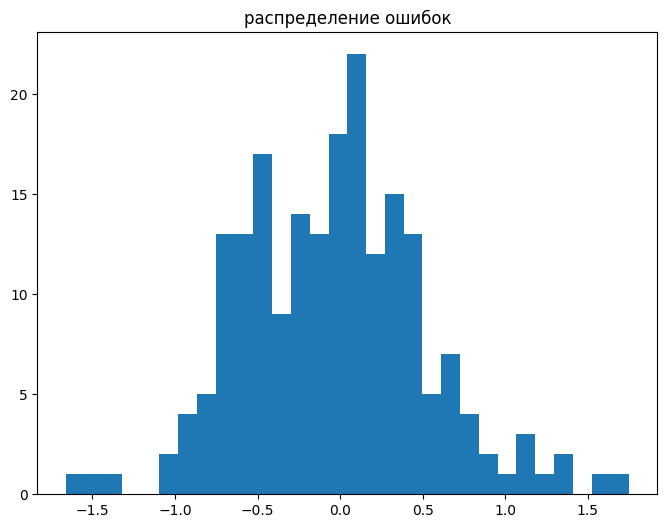

In [18]:
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30)
plt.title('распределение ошибок')
plt.show()

## в целом вошли в нормальное распределение значит мы крутые (наверное)

In [19]:
print(f"эм эс е {mean_squared_error(y_test, y_pred)}")

эм эс е 0.3083519746389996
